In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

In [2]:
x = tf.Variable(9, dtype=tf.float32, name='x')
session = tf.Session()
session.run(tf.global_variables_initializer())
# session.close()

In [3]:
y = tf.square(x) # 제곱
print('1) ', session.run(y))

y = tf.reduce_mean([4.0, 5.0])  # 평균
print('2) ', session.run(y))

y = tf.sqrt(x)  # √ 제곱근
print('3) ', session.run(y))

1)  81.0
2)  4.5
3)  3.0


(5, 2)
[[0, 70], [2, 81], [4, 93], [6, 91], [8, 97]]
[0, 2, 4, 6, 8]
[70, 81, 93, 91, 97]


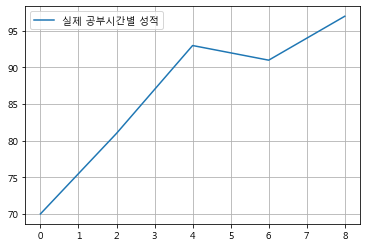

In [4]:
# x, y의 데이터 값
# ----------------------------------
# 공부 시간: 0    2    4    6    8
# 실제 성적: 60  81   93   91   97
# ----------------------------------
data = [[0, 70], [2, 81], [4, 93], [6, 91], [8, 97]]
# print(data.shape)  # list임으로 ERROR
print(np.array(data).shape)  # (5, 2)
print(data)
# [
#     [0, 60],
#     [2, 81], 
#     [4, 93], 
#     [6, 91],
#     [8, 97]
# ]
# 첫번째 열만 추출
x_data = [row[0] for row in data]
print(x_data)
# 두번째 열만 추출
y_data = [row[1] for row in data]
print(y_data)

plt.plot(x_data, y_data, label='실제 공부시간별 성적')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# 균등분포 난수 발생: tf.random_uniform(shape, 최소값, 최대값)
atest = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0), name='atest')
btest = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0), name='btest')

session.run(tf.global_variables_initializer()) # 변수가 새로 선언되면 실행
print(atest)
print(session.run(atest))
print(session.run(btest))

<tf.Variable 'atest:0' shape=(1,) dtype=float64_ref>
[8.06901302]
[80.69013021]


In [6]:
# f(x) = ax + b
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0), name='atest')
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0), name='btest')
session.run(tf.global_variables_initializer())

predict = [] # 예상 성적 

y = a * 0 + b  #  0시간 공부
predict.append(session.run(y))
print('1)', predict[0])

y = a * 2 + b  #  2시간 공부
predict.append(session.run(y))
print('2)', predict[1])

y = a * 4 + b  #  4시간 공부
predict.append(session.run(y))
print('3)', predict[2])

y = a * 6 + b  #  6시간 공부
predict.append(session.run(y))
print('4)', predict[3])

y = a * 8 + b  #  8시간 공부
predict.append(session.run(y))
print('5)', predict[4])

1) [80.69013021]
2) [96.82815626]
3) [112.9661823]
4) [129.10420834]
5) [145.24223438]


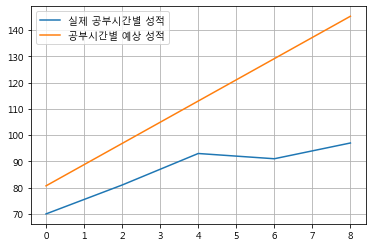

In [7]:
plt.plot(x_data, y_data, label='실제 공부시간별 성적')
plt.plot(x_data, predict, label='공부시간별 예상 성적')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
y = a * x_data + b
fx = session.run(y)
print(fx)

[ 80.69013021  96.82815626 112.9661823  129.10420834 145.24223438]


In [9]:
# 나열된 데이터의 편차의 합은? 0
avg = np.mean(x_data)
print(avg)
print(avg - x_data)  # 편차
print(np.sum(avg-x_data))  # 편차의 합
print(np.sum((avg-x_data)**2))  # 편차의 제곱
var = np.sum((avg-x_data)**2) / len(x_data)
print(var) # 분산
print(np.sqrt(var)) # 표준편차

4.0
[ 4.  2.  0. -2. -4.]
0.0
40.0
8.0
2.8284271247461903


In [10]:
# 텐서플로 RMSE(Root Mean Squared Error) 평균 제곱근 오차 함수
# 오차 = y(예측 성적, List 형식) - y_data(실제 성적)
# square: 제곱, reduce_mean: 모든 차원을 줄이고 하나의 스칼라값인 평균을 출력,
# sqrt: 루트
# 오차의 확인
error = y_data - y  
print(error) # Tensor 타입 출력

print(session.run(tf.square(y - y_data))) # 오차의 제곱하여 양수로 전환
print(session.run(tf.reduce_mean(tf.square(y - y_data)))) # 오차의 평균
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))     # 평균 제곱근 오차
print('rmse:', session.run(rmse))

Tensor("sub:0", shape=(5,), dtype=float64)
[ 114.27888398  250.53053046  398.64843558 1451.93069332 2327.31317836]
908.5403443391031
rmse: 30.14200299149184


In [11]:
# rmse: 30.14200299149184 오차를 줄여나가는 학습 과정이 필요함.

In [12]:
# 학습률을 0.1(10%)로 가정, 오차를 줄여 나가는 비율
learning_rate = 0.1

# RMSE 값을 최소로 하는 값을 Tensorflow가 찾아줌
# 오차의 줄이는 경사 하강법 자동 실행, 학습률과 평균 제곱근 오차 함수 이용
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)
# <class 'tensorflow.python.framework.ops.Operation'>
print('--> gradient_decent type: ', type(gradient_decent))
gradient_decent

--> gradient_decent type:  <class 'tensorflow.python.framework.ops.Operation'>


<tf.Operation 'GradientDescent' type=NoOp>

In [13]:
# session = tf.Session()
# session.run(tf.global_variables_initializer())
print('1) a(기울기 가정): ', session.run(a))
print('2) b(y 절편 가정): ', session.run(b))
print('3) 성적 산출 예상 공식(1차 함수 그래프): y = %.4fx + %.4f' % (session.run(a), session.run(b)))

1) a(기울기 가정):  [8.06901302]
2) b(y 절편 가정):  [80.69013021]
3) 성적 산출 예상 공식(1차 함수 그래프): y = 8.0690x + 80.6901


In [14]:
print('4) 예상 성적 y List 값: ', session.run(y)) # y = 8.0690x + 80.6901의 값
print('5) rmse(평균 제곱근 오차): ', session.run(rmse))
print('6) learning_rate(학습률): ', learning_rate)

4) 예상 성적 y List 값:  [ 80.69013021  96.82815626 112.9661823  129.10420834 145.24223438]
5) rmse(평균 제곱근 오차):  30.14200299149184
6) learning_rate(학습률):  0.1


In [15]:
print('7) Tensorflow에의한 경사 하강법을 이용한 기울기a와 y절편 b 최적화 시작')
# session = tf.Session() # session을 새로 생성해야 기존 학습이 초기화됨.
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0), name='atest')
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0), name='btest')
y = a * x_data + b # 예측값
learning_rate = 0.03
 # 평균 제곱근 오차, 예측값 - 실제값
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

session.run(tf.global_variables_initializer())

for step in range(301): # 0 ~ 300
    session.run(gradient_decent) # 최소의 오차를 찾기위한 경사하강 실행, 학습
    if step % 20 == 0:
        v_rmse = session.run(rmse) # 평균 제곱근 오차
        v_a = session.run(a)       # 기울기
        v_b = session.run(b)       # y 절편
        # print(v_a)
        fmt = "Epoch: %.f, RMSE = %.04f, 기울기 a = %.4f, y 절편 b = %.4f"
        print(fmt % (step, v_rmse, v_a, v_b))
        
# RMSE가 감소되는 확인 할것 
print('08) 최적의 산출 공식: y = %.1fx + %.d' % (v_a, v_b))  # y = 8.1x + 80

7) Tensorflow에의한 경사 하강법을 이용한 기울기a와 y절편 b 최적화 시작
Epoch: 0, RMSE = 29.4226, 기울기 a = 7.9245, y 절편 b = 80.6637
Epoch: 20, RMSE = 15.4322, 기울기 a = 5.0760, y 절편 b = 80.1272
Epoch: 40, RMSE = 5.6333, 기울기 a = 2.7255, y 절편 b = 79.5982
Epoch: 60, RMSE = 4.8903, 기울기 a = 2.2614, y 절편 b = 79.2903
Epoch: 80, RMSE = 4.8032, 기울기 a = 2.2779, y 절편 b = 79.0628
Epoch: 100, RMSE = 4.7212, 기울기 a = 2.3141, y 절편 b = 78.8439
Epoch: 120, RMSE = 4.6431, 기울기 a = 2.3501, y 절편 b = 78.6304
Epoch: 140, RMSE = 4.5688, 기울기 a = 2.3853, y 절편 b = 78.4222
Epoch: 160, RMSE = 4.4984, 기울기 a = 2.4195, y 절편 b = 78.2195
Epoch: 180, RMSE = 4.4319, 기울기 a = 2.4528, y 절편 b = 78.0224
Epoch: 200, RMSE = 4.3691, 기울기 a = 2.4852, y 절편 b = 77.8310
Epoch: 220, RMSE = 4.3101, 기울기 a = 2.5165, y 절편 b = 77.6454
Epoch: 240, RMSE = 4.2547, 기울기 a = 2.5469, y 절편 b = 77.4656
Epoch: 260, RMSE = 4.2029, 기울기 a = 2.5763, y 절편 b = 77.2917
Epoch: 280, RMSE = 4.1545, 기울기 a = 2.6047, y 절편 b = 77.1236
Epoch: 300, RMSE = 4.1095, 기울기 a = 2.6321, y 절편 b = 76.9

09) 산출된 최적의 선형회귀 모델을 이용한 경우
공부시간: 0, 실제 성적: 70, 예상 성적: 76
공부시간: 2, 실제 성적: 81, 예상 성적: 82
공부시간: 4, 실제 성적: 93, 예상 성적: 87
공부시간: 6, 실제 성적: 91, 예상 성적: 92
공부시간: 8, 실제 성적: 97, 예상 성적: 98


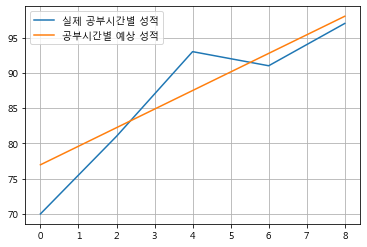

In [16]:
print('09) 산출된 최적의 선형회귀 모델을 이용한 경우')
test_data = [0, 2, 4, 6, 8]
predict = []
for i in range(len(test_data)):
    y = v_a * test_data[i] + v_b # 0 * 8.1 + 80
    predict.append(y) 
    print('공부시간: %d, 실제 성적: %d, 예상 성적: %d'  % (test_data[i], y_data[i], predict[i],))

plt.plot(test_data, y_data, label='실제 공부시간별 성적')
plt.plot(x_data, predict, label='공부시간별 예상 성적')
plt.legend()
plt.grid(True)
plt.show()

# 추세선이 성적의 흐름과 비슷함.

In [18]:
print('10) 학습률 하이퍼 파라미터에 따른 경사하강의 특징')
# session = tf.Session() # session을 새로 생성해야 기존 학습이 초기화됨.
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0), name='atest')
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0), name='btest')
y = a * x_data + b
learning_rate = 2.0
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))     # 평균 제곱근 오차
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

session.run(tf.global_variables_initializer())

for step in range(301): # 0 ~ 200
    session.run(gradient_decent) # 최소의 오차를 찾기위한 경사하강 실행, 학습
    if step % 20 == 0:
        v_rmse = session.run(rmse) # 평균 제곱근 오차
        v_a = session.run(a)           # 기울기
        v_b = session.run(b)           # y 절편
        
# 2시간 학습 실제 성적: 81
print('학습률 %s: y = %.1fx + %.f 2시간 예상 성적: %d' % (learning_rate, v_a, v_b, v_a*2 + v_b))  
# 학습률 0.001: y = 6.7x + 80 2시간 예상 성적: 93
# 학습률 0.01: y = 2.3x + 79 2시간 예상 성적: 83
# 학습률 0.03: y = 2.7x + 76 2시간 예상 성적: 81
# 학습률 0.05: y = 3.1x + 74 2시간 예상 성적: 80
# 학습률 0.1: y = 3.7x + 71 2시간 예상 성적: 78
# 학습률 0.3: y = 4.2x + 68 2시간 예상 성적: 76
# 학습률 0.6: y = 3.3x + 67 2시간 예상 성적: 74
# 학습률 0.9: y = 6.1x + 68 2시간 예상 성적: 80
# 학습률 2.0: y = -0.6x + 67 2시간 예상 성적: 65

# 최적의 학습률은 우수한 결과가 발생하나 개발자가 찾는 것은 어려움으로
# 여러가지 자동화된 학습률 기법을 이용
 
 

10) 학습률 하이퍼 파라미터에 따른 경사하강의 특징
학습률 2.0: y = -1.6x + 73 2시간 예상 성적: 69
